![pl](https://logodownload.org/wp-content/uploads/2016/03/premier-league-2.png)

# Premier League - An Exploratory Data Analysis
---

The Premier League (PL) is the most-watched domestic club competition on the planet. The PL draws the [highest global television audience of any football league and has the most live coverage of all European leagues.](https://www.premierleague.com/this-is-pl/the-fans/686489?articleId=686489)

We will be using the `pandas` library to explore the dataset and attempt to unpack some trends in the data to see how the league has changed since its the inception of the 20 team league.

The dataset records the league tables of PL seasons 1965-2021. It can be downloaded [here](https://www.kaggle.com/birdogd/english-football-premier-league-tables-19652021).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We will only consider data from the 20-team PL, which began from the 1995/1996 season onwards. Seasons prior to that feature different number of teams and we would have to normalize the data to obtain a fair comparison, which increases the entire complexity of the endeavour. Besides we have 26 seasons worth of data since the inception of the 20-team PL so the omission of earlier seasons is acceptable.

The code cell below filters data from the 1995/1996 season onwards.

In [2]:
# prepping the dataframe

df = pd.read_csv('...data/tables_1965_2021.csv')
pl = df.copy()
pl = pl.iloc[:520].drop(columns=['p']).rename(columns={'f':'GF', 'a':'GA', 'gd':'GD'})

In this analysis, we will focus on 4 groups of teams.

1. `champions` - The PL Champions. The best team in England over the course of an entire PL season. Only included for reference.
2. `top6` - The top 6 teams are recognized as the best teams in England as they will represent the PL in the UEFA Champions League (pos 1-4) & UEFA Europa League (pos 5-6) to play against teams from the other european leagues. 
3. `top7_15` - These are mid-table teams. They are in the middle of the pack. 
4. `bot5` - The relegation zone. Teams in the bottom 5 are in danger of being demoted to the 2nd division (the bottom 3 teams get relegated). 

The different groups serve as a proxy for the quality of the teams. In our case, we split our teams from (2) to (4) to see if there are trends for these groups.

The code cell below prepares the dataframes of these 4 groups of teams for further analysis.

In [3]:
# further breaking down the groups of interest from the main dataframe

pl_mean = pl.groupby('season').mean()
pl_sum = pl.groupby('season').sum()

champions = pl[pl['pos']==1]
champions_sum = champions.groupby('season').sum()

top6 = pl[(pl['pos']<7)]
top6_mean = top6.groupby('season').mean()
top6_sum = top6.groupby('season').sum()
top6_min = top6.groupby('season').min()

top7_15 = pl[(pl['pos'] > 6) & (pl['pos'] < 16)]
top7_15_mean = top7_15.groupby('season').mean()

bot5 = pl[(pl['pos'] > 14) & (pl['pos'] <= 20)]
bot5_mean = bot5.groupby('season').mean()
bot5_sum = bot5.groupby('season').sum()
bot5_max = bot5.groupby('season').max()

Taking a macro-view of the distribution of points from the past 26 seasons, we can see that the distributions differ from season to season.

<AxesSubplot:title={'center':'points'}, xlabel='season'>

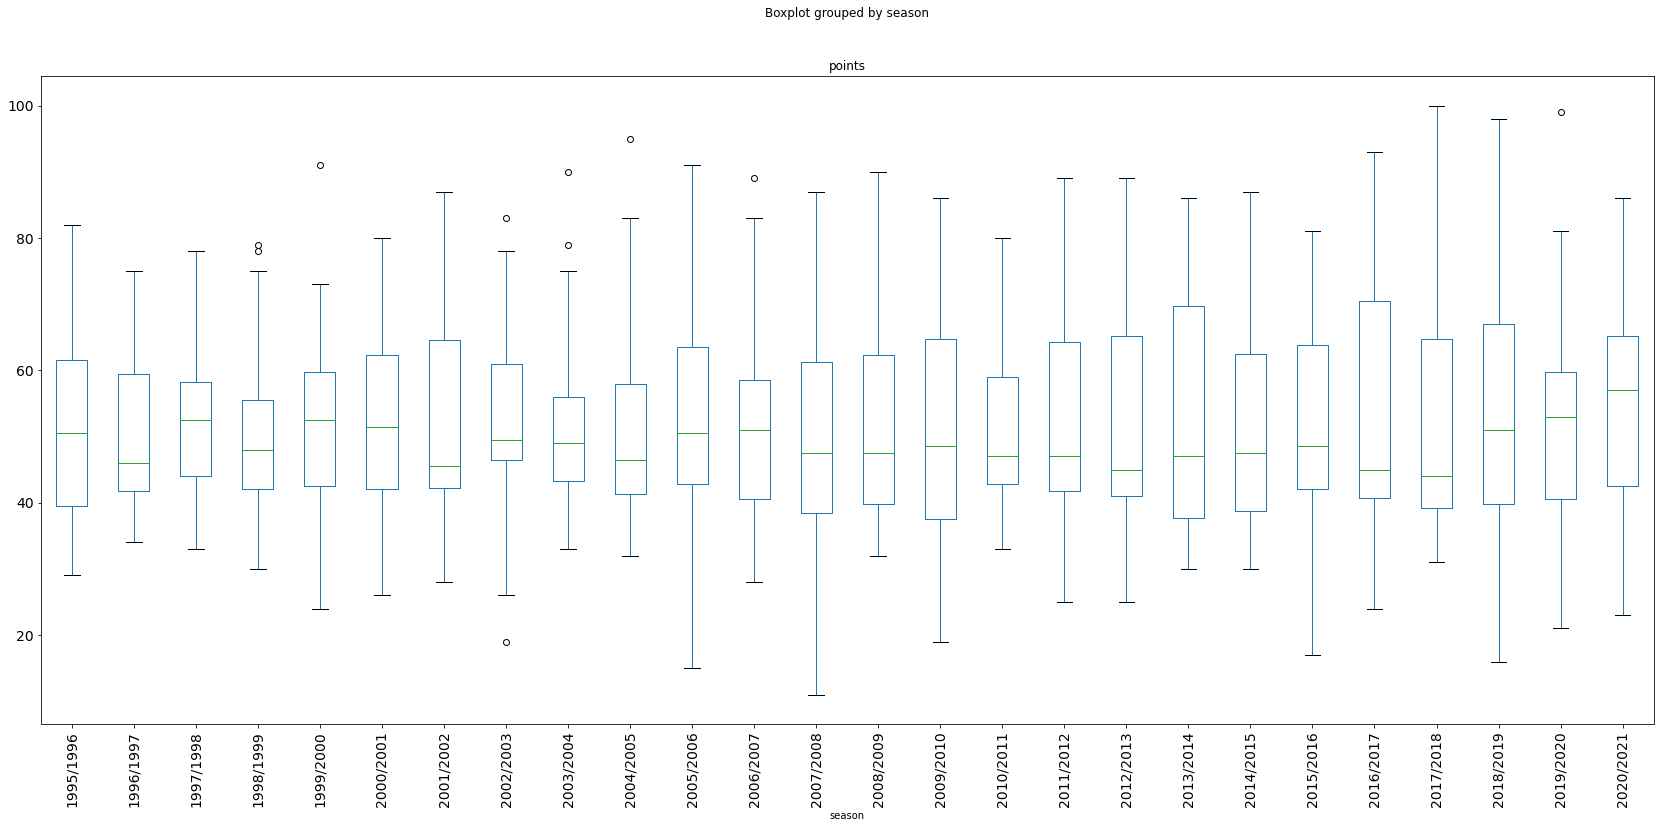

In [4]:
pl.boxplot(column='points', by='season', figsize=(28,12), rot=90, fontsize=14, grid=False)

For the analyses below, we will use the metrics as a proxy for certain measures (short of more granular data)
1. Goals For (GF): The number of goals a team scores over the season. This will be used as a measure of a team's **offensive effort**
2. Goals Against (GA): The number of goals a team concedes over the season. This will be used as a measure of a team's **defensive effort**
3. Goal Difference (GD): Net goals scored taking into account the goals a team conceded. Subtract GA from GF. This will be used as a measure of a team's **performance** over the course of a season.
4. Points: Number of points a team accumalates throughout a season. This will be used as a overall measure of a team's **ability relative to the other teams**

## Points Analysis

The plot below (with the exception of the points accumulated by PL champions in BLUE) shows the average points over the course of 26 seasons for the 3 groups of teams. The World Cup years are also indicated (i.e the World Cup commences after the conclusion of that particular season). We can make the following observations.

* The gap between `top7_15` is observed to be closer to `bot5` than `top6`. This suggests that on average, the ability of the mid-table teams are closer to the relegation zone teams than with the top 6 teams.

* However, the gap in points between `top7_15` and `top6` seem to be narrowing since the 2017/2018 season. This may suggest that the quality of the mid-table teams are improving. This is mirrored by the downward trend of the `bot5` teams where the average points are on a downward trend since the 2017/2018 season. Since the league is a zero-sum game (points are gained at the expense of the other team) We can see that the increase in performance of mid-table teams are due to the fact they take more points away from the top and bottom teams.

* The points obtained by `top6` teams in the season following a World Cup year (with the exception of 1998/1999 & 2018/2019 seasons after the 1998 and 2018 World Cup) is always lower than the previous season. As top teams are generally made up of top players who will be selected by their national teams to participate in the World Cup, this drop in performance may be due to the fatigue of not having a full summer break to recover. Data on player contribution to the teams in the World Cup by PL team will help confirm this hypothesis.

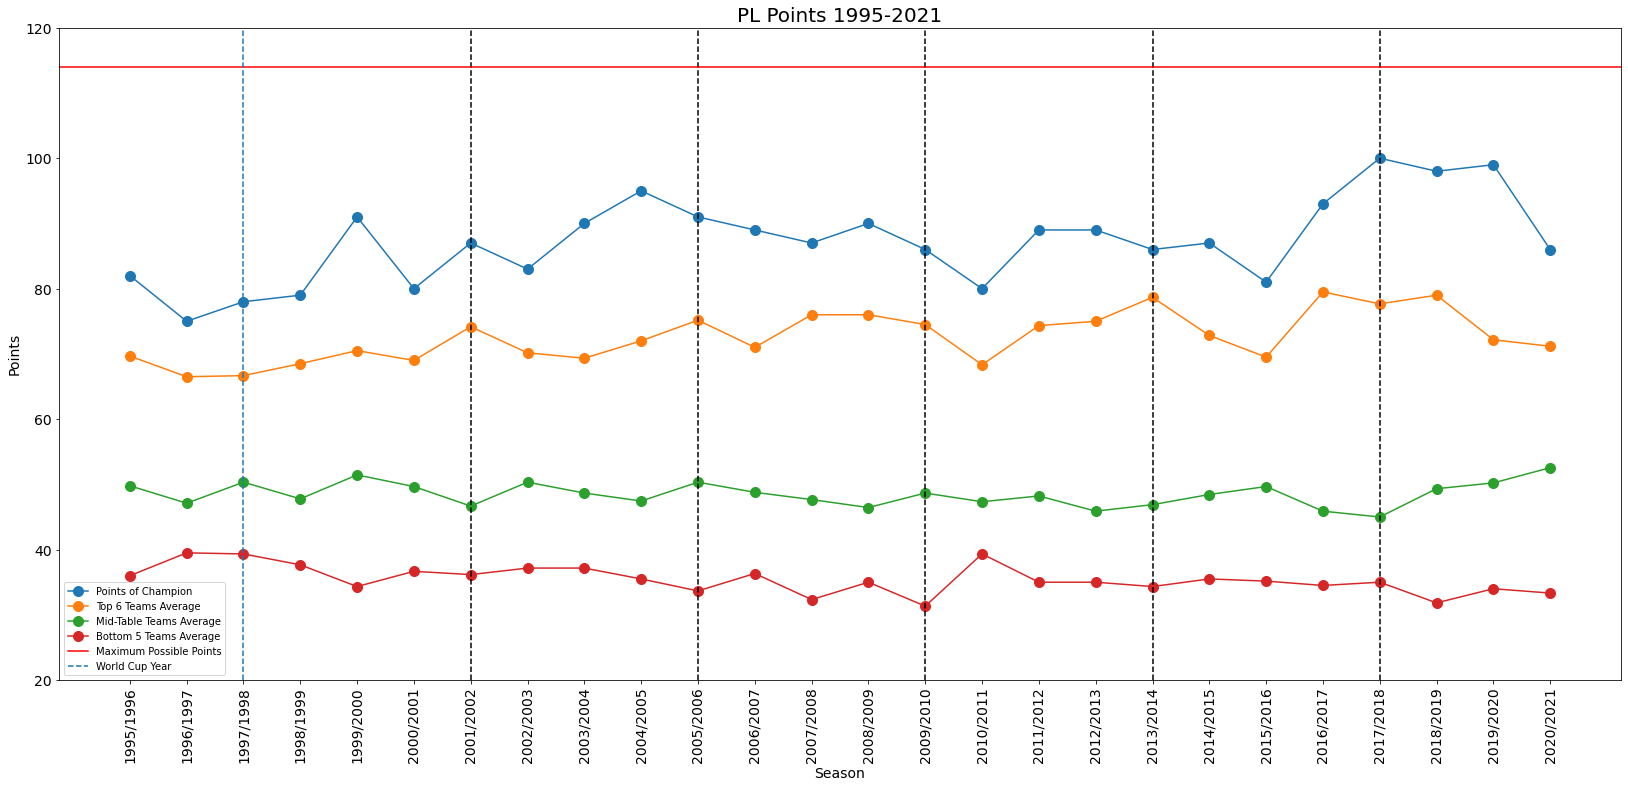

<Figure size 432x288 with 0 Axes>

In [5]:
fig, ax = plt.subplots(figsize=(28,12))
ax = plt.plot(champions_sum['points'], label='Points of Champion', marker='.', markersize=20)
ax = plt.plot(top6_mean['points'], label='Top 6 Teams Average', marker='.', markersize=20)
ax = plt.plot(top7_15_mean['points'], label='Mid-Table Teams Average', marker='.', markersize=20)
ax = plt.plot(bot5_mean['points'], label='Bottom 5 Teams Average', marker='.', markersize=20)
ax = plt.axvline(x='2001/2002', linestyle='--', color='black')
ax = plt.axvline(x='2005/2006', linestyle='--', color='black')
ax = plt.axvline(x='2009/2010', linestyle='--', color='black')
ax = plt.axvline(x='2013/2014', linestyle='--', color='black')
ax = plt.axvline(x='2017/2018', linestyle='--', color='black')
ax = plt.axhline(y=(38*3), color='r', label='Maximum Possible Points')
ax = plt.axvline(x='1997/1998', linestyle='--', label='World Cup Year')

plt.legend(fontsize=10)
plt.title('PL Points 1995-2021', fontsize=20)
plt.ylabel('Points', fontsize=14)
plt.xlabel('Season', fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(20,120)
plt.xticks(rotation=90, fontsize=14)
plt.show()
plt.tight_layout()

### Closer Look at the `bot5`

As mentioned earlier, the bottom 3 teams will be relegated to the 2nd division in the following season, missing out on valuable revenue from being in the PL. It is not in the benefit of any team to want to be relegated from a financial perspective.

From the plot below, we observe tha the maximum points you need to secure for safety is on a downward trend, assuming that the quality of the teams in the relegation zone remains similar throughout the years, this suggests that it may be getting more difficult to earn points in the league so much so that you need a lower amount of points to stay up.

This may suggest that the gulf in quality of the bottom 5 teams and the other teams may be widening to the point where you only need a couple of results to be clear of the relegation zone.

There are no observable trends building up to and after a World Cup.

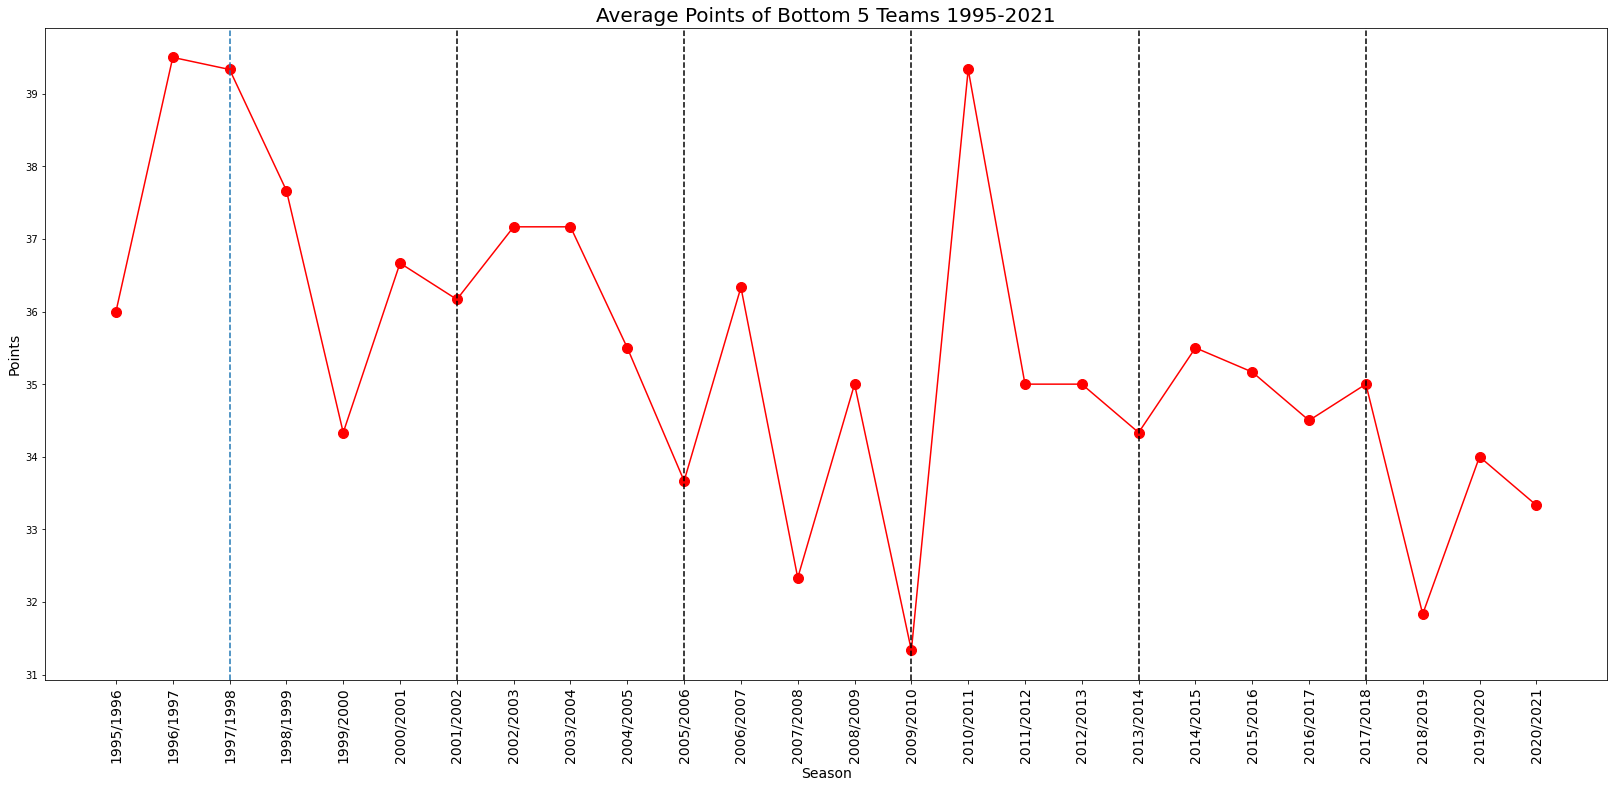

In [6]:
fig, ax = plt.subplots(figsize=(28,12))
ax = plt.plot(bot5_mean['points'], marker='.', markersize=20, color='red')

plt.title('Average Points of Bottom 5 Teams 1995-2021', fontsize=20)
ax = plt.axvline(x='1997/1998', linestyle='--', label='World Cup Year')
ax = plt.axvline(x='2001/2002', linestyle='--', color='black')
ax = plt.axvline(x='2005/2006', linestyle='--', color='black')
ax = plt.axvline(x='2009/2010', linestyle='--', color='black')
ax = plt.axvline(x='2013/2014', linestyle='--', color='black')
ax = plt.axvline(x='2017/2018', linestyle='--', color='black')
plt.ylabel('Points', fontsize=14)
plt.xlabel('Season', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

## Goal Difference Analysis

We can make some observations in the season building up to and after a World Cup year.

* `top6` teams seem to have a boost in GD in the season building up to a World Cup , this boost in performance may be due to the fact that players in the top 6 teams realize that they are on the radar for their national team coaches and want to perform well to be able to be selected to represent their country in the World Cup the following year.

* Similar to points, the GD of `top6` decreased across the board following the World Cup. The hypothesis for this dip in performance can be due to both fatigue from World Cup participation and perhaps the lack of motivation as the next World Cup will be 4 seasons away.

No observable trends for the `top7_15` and `bot5` teams.

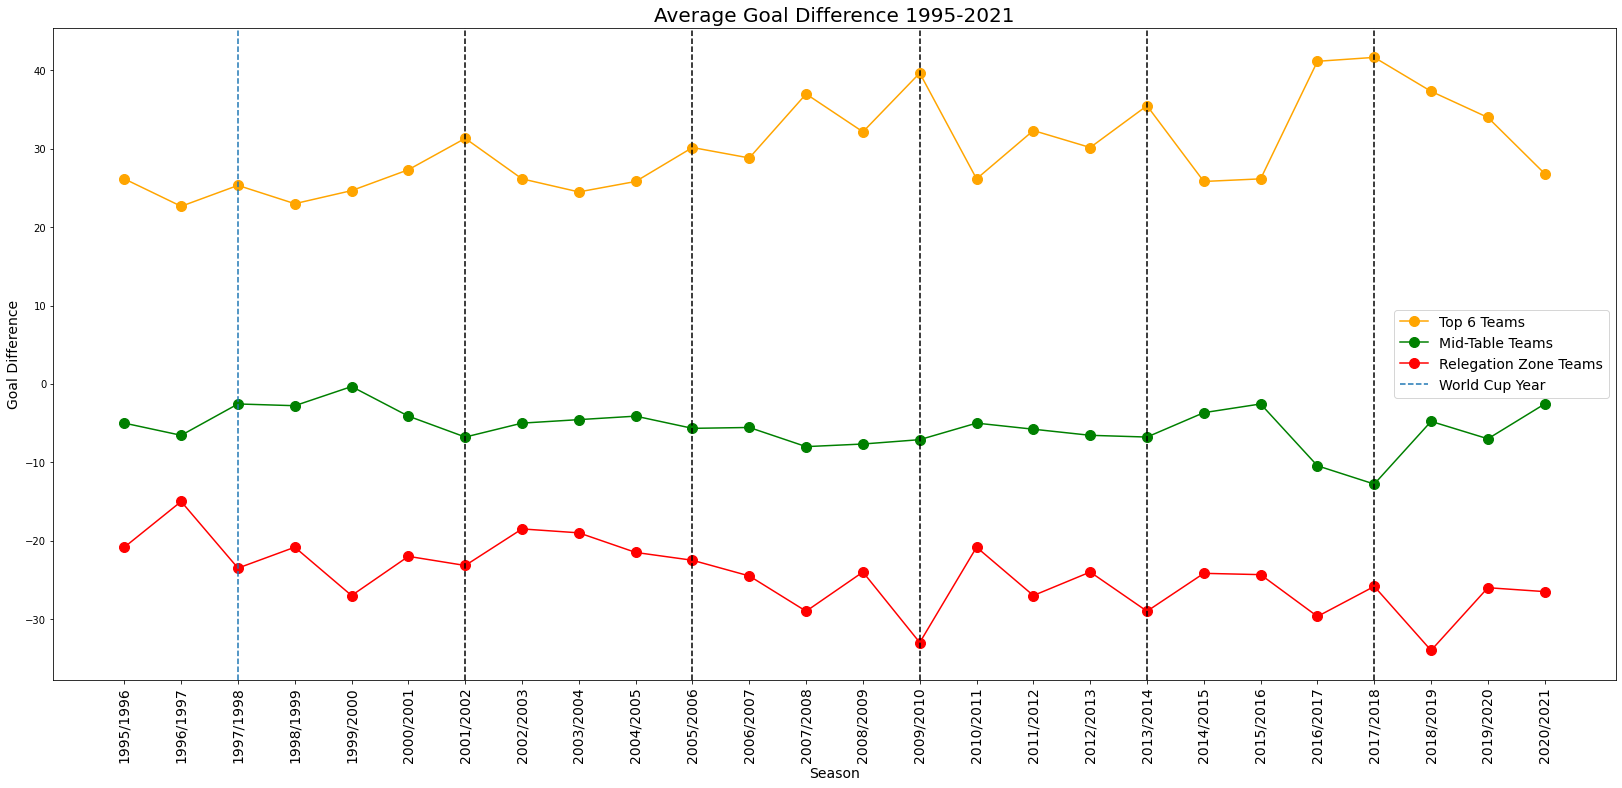

In [7]:
fig, ax = plt.subplots(figsize=(28,12))
ax = plt.plot(top6_mean['GD'], marker='.', markersize=20, label='Top 6 Teams', color='orange')
ax = plt.plot(top7_15_mean['GD'], marker='.', markersize=20, label='Mid-Table Teams', color='green')
ax = plt.plot(bot5_mean['GD'], marker='.', markersize=20, label='Relegation Zone Teams', color='red')
ax = plt.axvline(x='1997/1998', linestyle='--', label='World Cup Year')
ax = plt.axvline(x='2001/2002', linestyle='--', color='black')
ax = plt.axvline(x='2005/2006', linestyle='--', color='black')
ax = plt.axvline(x='2009/2010', linestyle='--', color='black')
ax = plt.axvline(x='2013/2014', linestyle='--', color='black')
ax = plt.axvline(x='2017/2018', linestyle='--', color='black')

plt.legend(fontsize=14)
plt.title('Average Goal Difference 1995-2021', fontsize=20)
plt.ylabel('Goal Difference', fontsize=14)
plt.xlabel('Season', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

## A Closer Look: Number of Teams that constitute the Top 6 position outside of the Big Five


The 'Big Five' of the PL are recognized as the strongest teams traditionally by journalists and fans alike. They are:
* Manchester United
* Chelsea
* Liverpool
* Manchester City
* Arsenal

We will examine PL standings to see if other teams had broken through this Big Five monopoly in the past 5 seasons.

In [8]:
# finding out index of the 2015/2016 season

df[df['season']=='2015/2016'].tail()

,season,name,pos,team,p,w,d,l,f,a,gd,points
115,2015/2016,Premier League 2015-2016,16,Bournemouth,38,11,9,18,45,67,-22,42
116,2015/2016,Premier League 2015-2016,17,Sunderland,38,9,12,17,48,62,-14,39
117,2015/2016,Premier League 2015-2016,18,Newcastle United,38,9,10,19,44,65,-21,37
118,2015/2016,Premier League 2015-2016,19,Norwich City,38,9,7,22,39,67,-28,34
119,2015/2016,Premier League 2015-2016,20,Aston Villa,38,3,8,27,27,76,-49,17


From the table below, we can conclude that the Big Five monopoly remains largely intact, we acknowledge that they are not consistently in the top 6 positions every season. 3-4 of the Big Five teams are consistently in the top 6 positions.

In [9]:
# top6 teams every season

past_5_seasons = df.iloc[:120].drop(columns=['p']).rename(columns={'f':'GF', 'a':'GA', 'gd':'GD'})
past_5_seasons_top6 = past_5_seasons[past_5_seasons['pos'] < 7]
past_5_seasons_top6.groupby(['season', 'team']).sum()

pos   w   d   l   GF  GA  GD  points
season    team                                                    
2015/2016 Arsenal               2  20  11   7   65  36  29      71
          Leicester City        1  23  12   3   68  36  32      81
          Manchester City       4  19   9  10   71  41  30      66
          Manchester United     5  19   9  10   49  35  14      66
          Southampton           6  18   9  11   59  41  18      63
          Tottenham Hotspur     3  19  13   6   69  35  34      70
2016/2017 Arsenal               5  23   6   9   77  44  33      75
          Chelsea               1  30   3   5   85  33  52      93
          Liverpool             4  22  10   6   78  42  36      76
          Manchester City       3  23   9   6   80  39  41      78
          Manchester United     6  18  15   5   54  29  25      69
          Tottenham Hotspur     2  26   8   4   86  26  60      86
2017/2018 Arsenal               6  19   6  13   74  51  23      63
          Chelsea               5  21   7  10   62  38  24      70
          Liverpool             4  21  12   5   84  38  46      75
          Manchester City       1  32   4   2  106  27  79     100
          Manchester United     2  25   6   7   68  28  40      81
          Tottenham Hotspur     3  23   8   7   74  36  38      77
2018/2019 Arsenal               5  21   7  10   73  51  22      70
          Chelsea               3  21   9   8   63  39  24      72
          Liverpool             2  30   7   1   89  22  67      97
          Manchester City       1  32   2   4   95  23  72      98
          Manchester United     6  19   9  10   65  54  11      66
          Tottenham Hotspur     4  23   2  13   67  39  28      71
2019/2020 Chelsea               4  20   6  12   69  54  15      66
          Leicester City        5  18   8  12   67  41  26      62
          Liverpool             1  32   3   3   85  33  52      99
          Manchester City       2  26   3   9  102  35  67      81
          Manchester United     3  18  12   8   66  36  30      66
          Tottenham Hotspur     6  16  11  11   61  47  14      59
2020/2021 Chelsea               4  19  10   9   58  36  22      67
          Leicester City        5  20   6  12   68  50  18      66
          Liverpool             3  20   9   9   68  42  26      69
          Manchester City       1  27   5   6   83  32  51      86
          Manchester United     2  21  11   6   73  44  29      74
          West Ham United       6  19   8  11   62  47  15      65

# Conclusion

We notice that the looming presence of an upcoming World Cup is an effective indicator of the performance of a team that is expected to finish in the Top 6 positions in the PL. Trainers and coaches of the Big Five teams should be mindful of the performance impact leading up to and after a World Cup to better manage player's energy levels and physical condition to mitigate against detrimental performance.

As fans of the PL, we can also look forward to a more competitive PL as the mid-table teams slowly bridge the difference in ability to the top 6 and it will definitely make for more entertaining games with teams closer in quality than ever to secure european football and avoid the dreaded relegation zone.

### Future Updates!


This concludes our preliminary EDA on the past 26 PL seasons. Additions to this series can be expected as there is a multitude of analysis that can be further accomplished using this dataset. One update that I plan to make is to include a correlation analysis of the features in the PL data as well as examine the impact of the COVID-19 disruption on the sporting performance of PL teams at the tail-end of the 2019/2020 and the majority of the 2020/2021 season.

Stay Tuned.